# Trabalho

### Entrega 29/02 as 23:59

## Funções utilitárias

In [1]:
import glob

caminho = '../datasets/genius/*/*.txt'
arquivos = glob.glob(caminho)

got = {}
for arquivo in sorted(arquivos):
    chave = arquivo[-14:-4]
    
    with open(arquivo, 'r', encoding = 'utf-8') as f:
        texto = f.read()
    
    got[chave] = texto


In [2]:
def get_lines(text):
    lines = text.split('\n')
    # remove linhas em branco
    lines = [line for line in lines if line != '']
    return lines

In [141]:
def is_someone_speaking(line):
    line = line.upper()
    return line.find(':') > 0 \
        and not line.startswith('CUT TO:') \
            and not line.startswith('"') \
                and not line.startswith('[') \
                    and not line.startswith('FADE TO:') \
                        and not line.startswith('FADE OUT.') \
                            and not line.startswith('THE END') \
                                and not line.startswith('END') \
                                    and not line.startswith('CONTINUED') \
                                        and not line.startswith('CONT.') \
                                            and not line.startswith('OMITTED') \
                                                and not line.startswith('OMIT') \

characters_to_ignore = ['EXT.', 'INT.']
characters_to_ignore_start = ['WOMAN', 'WIFE', 'WILDLING', 'WHORE', 'UNSULLIED', 'YOUNG MAN', 'MAN']

def is_someone_to_ignore(characters_names):
    for character in characters_names:
        if character in characters_to_ignore:
            return True
        for character_start in characters_to_ignore_start:
            if character.startswith(character_start):
                return True
    return False


names_equals = {
    'CERSEL': 'CERSEI'
}

def fix_names(name):
    if(name in names_equals):
        return names_equals[name]
    else:
        return name


def get_characters_speaking(line):
    names = []
    if is_someone_speaking(line):
        character = line.split(':')[0].upper()
        # remove o conteúdo dentro dos parênteses do nome do personagem
        character = character.split('(')[0].strip()
        # se tiver um nome com / (ex: Ned/Catelyn), separa e adiciona os dois nomes
        if '/' in character:
            names = [fix_names(name) for name in character.split('/')]

        else:
            names.append(fix_names(character))
        
    return names


In [60]:
def get_scenes(ep_lines):
    scenes = []
    
    scene = {
        'title' : 'Início do episódio',
        'lines' : []
    }
    for ep_line in ep_lines:
        if is_someone_speaking(ep_line):
            line = ep_line.split(':')[1]
            characters_speaking = get_characters_speaking(ep_line)
            
            if is_someone_to_ignore(characters_speaking):
                continue

            scene['lines'].append({
                'character' : {
                    'speaking' : characters_speaking,
                },
                'line' : line
            })
        else:
            scene = {
                'title' : ep_line,
                'lines' : []
            }
            scenes.append(scene)
    return scenes

In [43]:
def get_episodes(got):
    episodes = {}
    for key in got.keys():
        ep_lines = get_lines(got[key])
        title = ep_lines[0]

        if not title.lower().startswith('episode'):
            title = key

        episodes[key] = {
            'title' : title,
            'scenes' : get_scenes(ep_lines)
        }
    return episodes

In [38]:
def get_list_characters(episodios):
    characteres_speaking = []
    connections_by_scene = []
    for key in episodios.keys():
        scenes = episodios[key]['scenes']
        for scene in scenes:
            lines = scene['lines']
            characteres_in_scene = []
            for line in lines:
                characteres_in_scene += line['character']['speaking']
            if(len(characteres_in_scene) > 0):
                characteres_speaking += characteres_in_scene
                connections_by_scene.append(set(characteres_in_scene))

    characters_names = sorted(set(characteres_speaking))
    # print(connections_by_scene)

    # cria um dicionário com os nomes dos personagens e a frequência com que eles aparecem
    characters = []
    for i, name in enumerate(characters_names):
        character = {
            'id': i,
            'name' : name,
            'frequency' : characteres_speaking.count(name),
            'connections' : {}
        }

        characters.append(character)
        for connection in connections_by_scene:
            if name in connection:
                for connection_name in connection:
                    if connection_name != name:
                        if connection_name in character['connections']:
                            character['connections'][connection_name] += 1
                        else:
                            character['connections'][connection_name] = 1
            
    return characters

## Trabalhando o dado

In [142]:
episodios = get_episodes(got)

In [143]:
characters = get_list_characters(episodios)

# remova os personagens que aparecem poucas vezes na serie
characters = [character for character in characters if character['frequency'] > 20]
print('total de personagens', len(characters))

# sort by frequency
characters = sorted(characters, key=lambda k: k['frequency'], reverse=True)
# characters
for name in characters[-30:-1]:
    print('character', name)

total de personagens 174
character {'id': 504, 'name': 'ROBIN', 'frequency': 29, 'connections': {'LITTLEFINGER': 7, 'LYSA': 3, 'SANSA': 4, 'PETYR': 1, 'YOHN ROYCE': 3, 'DAVOS': 1, 'DORNISH PRINCE': 1, 'VALE LORD': 1, 'BRIENNE': 1, 'YARA': 1, 'MAESTER WOLKAN': 1, 'IRONBORN LORD': 1, 'GENDRY': 1}}
character {'id': 622, 'name': 'TYENE', 'frequency': 29, 'connections': {'OBARA': 3, 'ELARIA': 1, 'BRONN': 8, 'NYMERIA': 4, 'JAIME': 1}}
character {'id': 2, 'name': 'AEMON', 'frequency': 28, 'connections': {'SAM': 5, 'ALL TOGETHER': 1, 'SHADOW TOWER BROTHER': 1, 'JON': 2, 'GILLY': 1}}
character {'id': 35, 'name': 'BARRISTAN SELMY', 'frequency': 28, 'connections': {'JAIME LANNISTER': 1, 'ROBERT BARATHEON': 2, 'LANCEL LANNISTER': 2, 'EDDARD STARK': 2, 'BARRISTON': 1, 'RENLY BARATHEON': 1, 'LORD VARYS': 2, 'NED STARK': 2, 'CERSEI LANNISTER': 3, 'PETYR BAELISH': 1, 'CHAMPION': 2, 'DAENERYS': 3, 'GREY WORM': 1, 'DAEYNERYS': 1, 'JORAH': 1, 'DAARIO': 1, 'MISSANDEI': 1}}
character {'id': 271, 'name': 'K

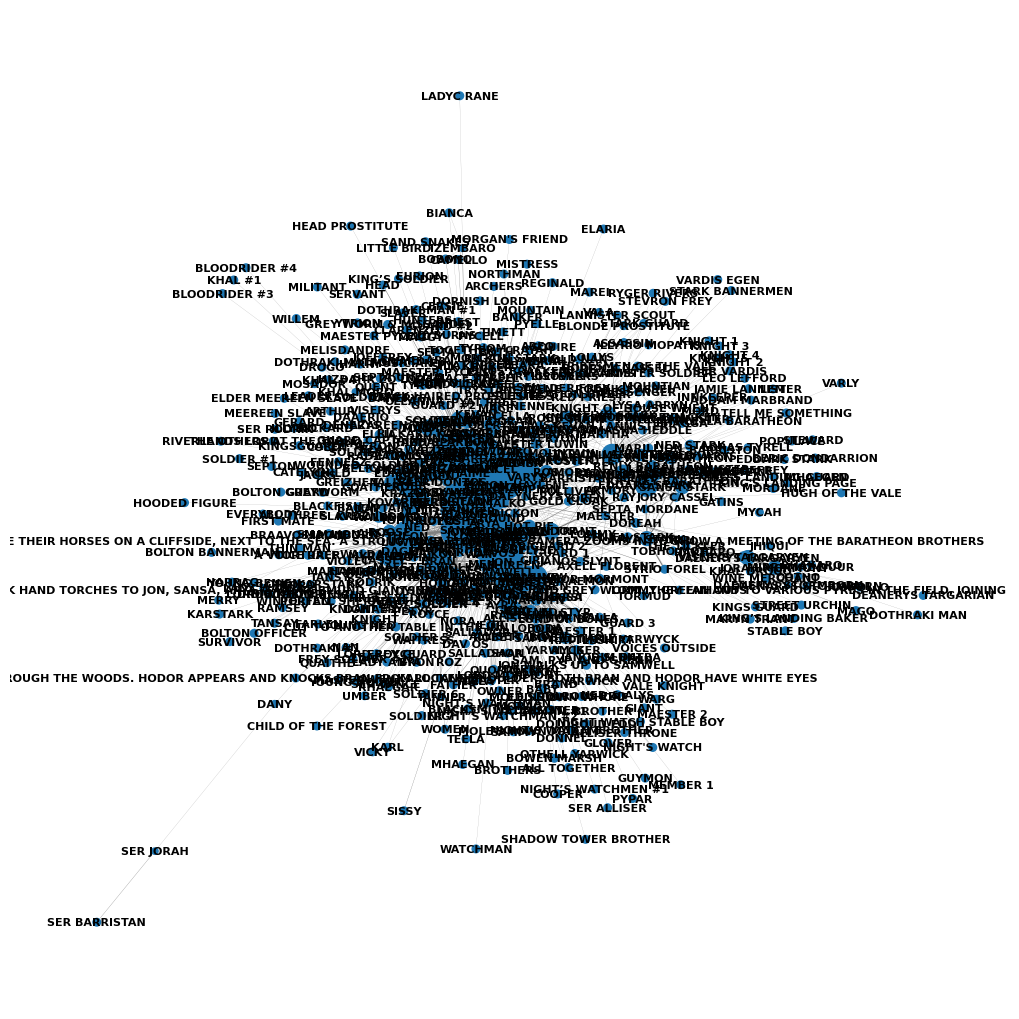

In [150]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# temp = characters[-2:-1]
temp = characters
# temp = characters[0:1]
# print(temp)

for character in temp:
    G.add_node(character['name'], frequency=character['frequency'])

for character in temp:
    connections = character['connections']
    for connection in connections:
        G.add_edge(character['name'], connection, weight=connections[connection])

node_sizes = []
for n, attrs in G.nodes(data=True):
    if 'frequency' in attrs:
        node_sizes.append(attrs['frequency'])
    else:
        node_sizes.append(30)


# node_sizes = [attrs['frequency'] * 100 for node, attrs in G.nodes(data=True)]
edge_widths = [G[u][v]['weight'] / 10 for u, v in G.edges()]

# max_weight = max([G.nodes[n]['frequency'] for n in G.nodes()])
# node_colors = [plt.cm.viridis(G.nodes[n]['frequency']/max_weight) for n in G.nodes()]


plt.figure(figsize=(10,10))
# plt.figure(figsize=(20,20))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=node_sizes, edge_color='grey', width=edge_widths, font_size=8)
plt.show()



In [131]:
for n, attrs in G.nodes(data=True):
    print(n, attrs['frequency'])

# for node, attrs in G.nodes(data=True):
#     print(node, attrs)

TYRION 1655
CERSEI 927
DAENERYS 927
JON 927
JAIME 912
SANSA 753
ARYA 712
DAVOS 524
THEON 424
VARYS 414
BRONN 406
SAM 406
BRIENNE 398
TYWIN 353
BRAN 340
JORAH 305
STANNIS 296
MARGAERY 283
RAMSAY 273
JON SNOW 262
MELISANDRE 243
ROBB 242
EDDARD STARK 239
SHAE 226
TORMUND 223
LITTLEFINGER 215
JOFFREY 210
GENDRY 207
TYRION LANNISTER 203
OLENNA 200
GILLY 199
EXT 191
MISSANDEI 188
CATELYN 181
YGRITTE 177
INT 170
DAARIO 164
THE HOUND 159
PODRICK 158
OSHA 145
YARA 144
OBERYN 132
BAELISH 126
SANDOR 126
GREY WORM 123
QYBURN 123
TOMMEN 123
CATELYN STARK 121
JAQEN 121
PETYR BAELISH 114
TALISA 114
THOROS 113
BERIC 104
MEERA 104
DAENERYS TARGARYEN 102
ROBERT BARATHEON 100
SAMWELL 99
ARYA STARK 98
HIGH SPARROW 93
SHIREEN 93
EURON 91
ROBB STARK 91
HOUND 90
JORAH MORMONT 90
SANSA STARK 88
GRENN 87
JOJEN 77
ROOSE 77
HOT PIE 76
LORAS 76
ROS 75
CERSEI BARATHEON 72
BARRISTAN 70
PYCELLE 69
LANCEL 67
THEON GREYJOY 67
JAIME LANNISTER 65
ELLARIA 62
LOCKE 62
NED 62
SAMWELL TARLY 61
SPARROW 61
MARWYN 57
WALDER 56

KeyError: 'frequency'

[200, 300, 200, 200, 300]
6


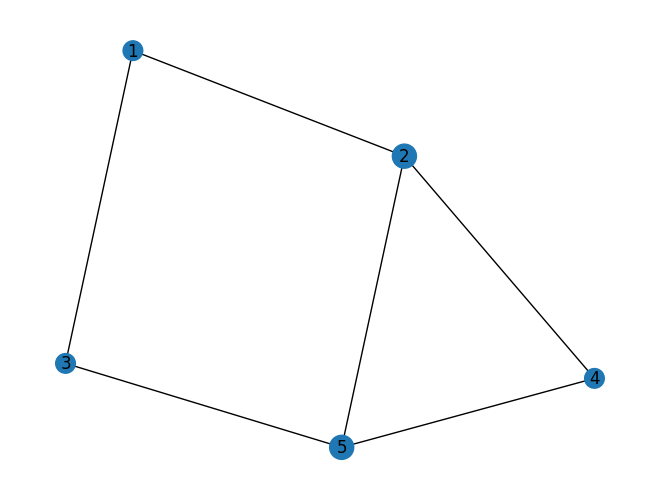

In [105]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
items = [(1, 2), (1, 3), (2, 4), (2, 5), (3, 5), (4, 5)]
G.add_edges_from(items)
node_sizes = [100 * G.degree(n) for n in G.nodes()]
print(node_sizes)
print(len(items))
nx.draw(G, with_labels=True, node_size=node_sizes)
plt.show()


In [9]:
def print_episode(episode):
    print('title:', episode['title'])
    for scene in episode['scenes']:
        print('scene:', scene['title'])
        for line in scene['lines']:
            print('-', line['character']['speaking'], ':', line['line'])

In [10]:
# for key in episodios.keys():
#     print_episode(episodios[key])

episodios.keys()

print_episode(episodios['got_s08e01'])

title: EPISODE 1 - WINTERFELL
scene: TITLE SEQUENCE
scene: EXT. WINTER TOWN - DAY
scene: A young boy runs through a snowy forest woods, he crosses a shallow stream and then runs through the streets of the winter town. As he runs through the town, pigs squeal and donkeys bray. He reaches the street and stands among a large crowd, struggling to see what is happening on the road. A man steps aside and the boy pushes through. Pan up to see ARYA STARK smiling as she watches the boy run through. A large army is marching along the road and the boy continues to run alongside them. He finds a tree and climbs up it to get a good view. Pan up to see the army marching along the road from the winter town up to Winterfell. A man's shout can be heard, and the boy turns to face the rear of the army. Pan around to see the large army of DAENERYS TARGARYEN. Cut to the middle of the army marching through the streets, DAENERYS and JON SNOW atop their horses. Cut to ARYA, she looks at JON and smiles, she st